In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn import preprocessing
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
tf.__version__

'1.15.0'

In [3]:
url = "https://tfhub.dev/google/elmo/2"
embed = hub.Module(url)

In [4]:
data = pd.read_csv(r"D:\collage work\Dissertation work\DATASET\train.csv", encoding = 'latin-1')

In [5]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a âPoster Child For White...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macyâs Is Said to Receive Takeover Approach ...,Michael J. de la Merced and Rachel Abrams,The Macyâs of today grew from the union of s...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
data.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
data = data.dropna()

In [8]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a âPoster Child For White...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macyâs Is Said to Receive Takeover Approach ...,Michael J. de la Merced and Rachel Abrams,The Macyâs of today grew from the union of s...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [9]:
x = data.drop('label',axis = 1)

In [10]:
x1 = x.drop('text',axis = 1)

In [11]:
x2 = x1.drop('author',axis = 1)

In [12]:
x3 = x2.drop('id',axis = 1)

In [13]:
x3

,title
0,House Dem Aide: We Didnât Even See Comeyâs...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...
...,...
20795,Rapper T.I.: Trump a âPoster Child For White...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,Macyâs Is Said to Receive Takeover Approach ...
20798,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [14]:
y = list(data['label'])
x4 = list(data['title'])

In [15]:
y

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,


In [16]:
x4

['House Dem Aide: We Didnâ\x80\x99t Even See Comeyâ\x80\x99s Letter Until Jason Chaffetz Tweeted It',
 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
 'Why the Truth Might Get You Fired',
 '15 Civilians Killed In Single US Airstrike Have Been Identified',
 'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery',
 'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart',
 'BenoÃ®t Hamon Wins French Socialist Partyâ\x80\x99s Presidential Nomination - The New York Times',
 'A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times',
 'Obamaâ\x80\x99s Organizing for Action Partners with Soros-Linked â\x80\x98Indivisibleâ\x80\x99 to Disrupt Trumpâ\x80\x99s Agenda',
 'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage',
 'Russian Researchers Discover Secret Nazi Military Base â\x80\x98Treasure Hunterâ\x80\x99 in the Arctic [Phot

In [17]:
y = data['label']

In [22]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [20]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [21]:
x3.shape

(18285, 1)

In [23]:
y.shape

(18285,)

In [24]:
sns.set_style("darkgrid")
sns.countplot(data.label)

C:\Users\KIMAYA\Anaconda3\envs\need\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

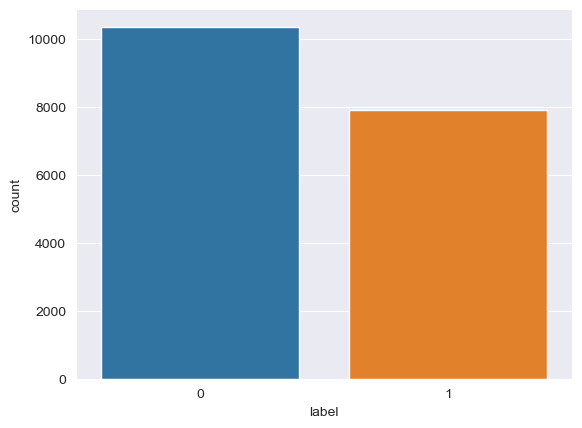

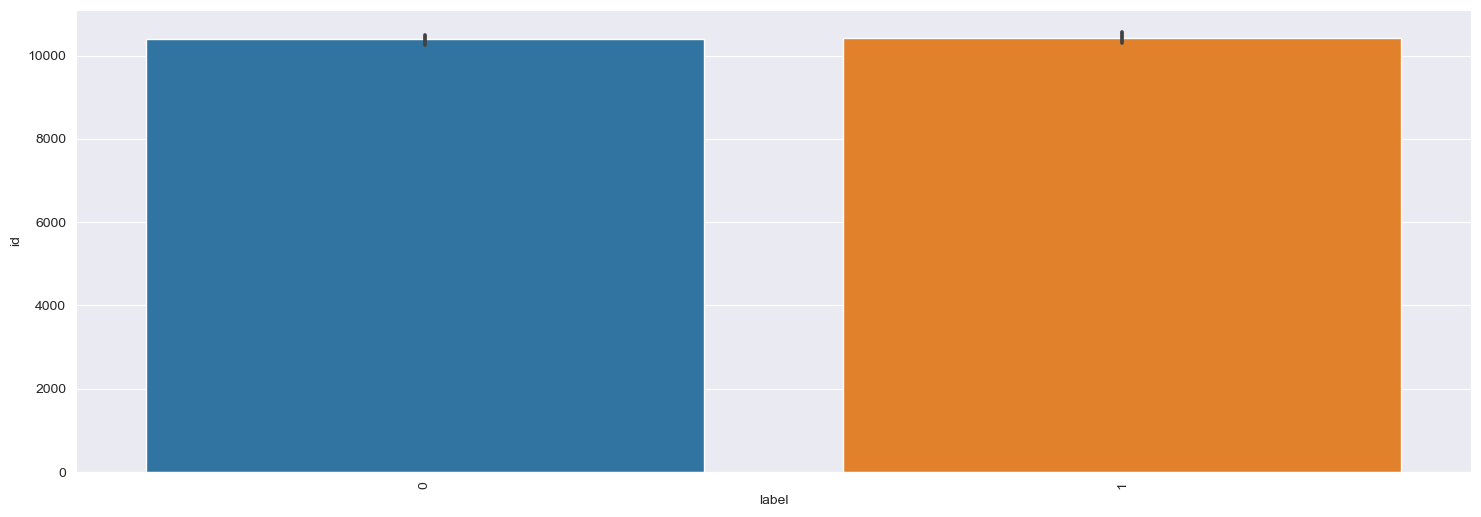

In [25]:
plt.figure(figsize=(18, 6))
ab = sns.barplot(x ='label' ,y= 'id',data = data)

plt.xticks(rotation = 90)
plt.ylabel('id')
plt.xlabel('label')
plt.show()

C:\Users\KIMAYA\Anaconda3\envs\need\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


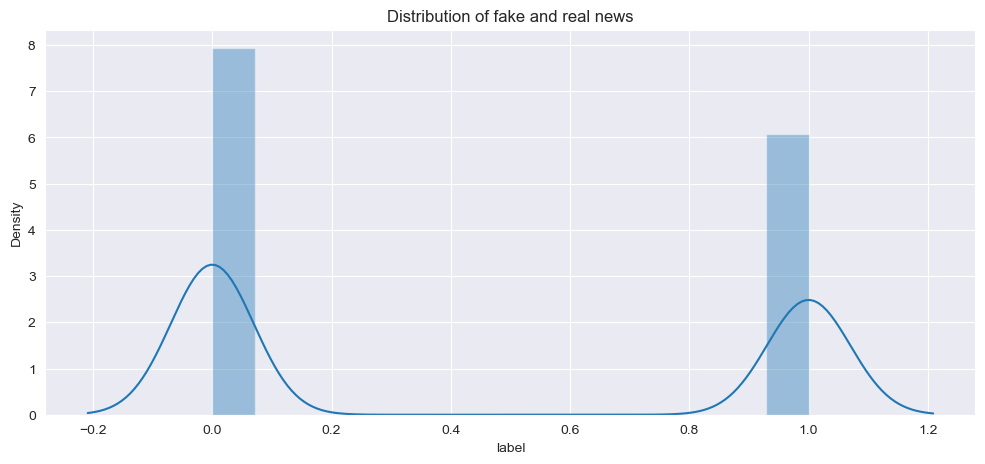

In [26]:
plt.figure(figsize=(12,5))
plt.title('Distribution of fake and real news')
sns.distplot(data.label)
plt.show()

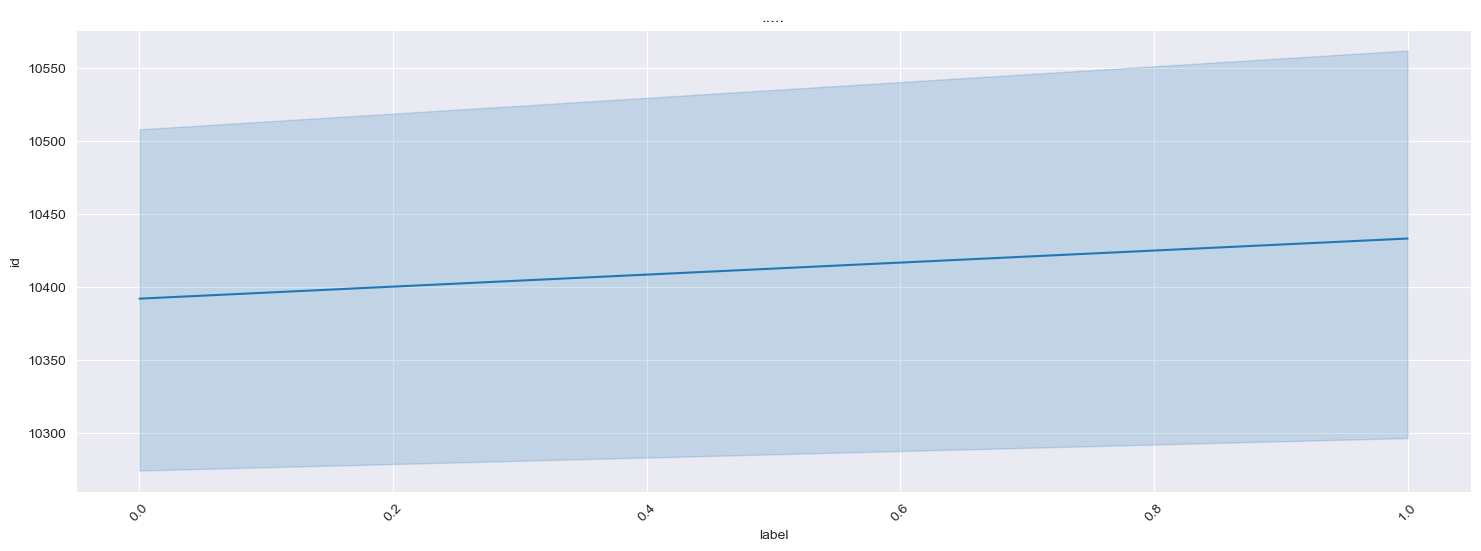

In [27]:
plt.figure(figsize=(18,6))
sns.lineplot(data=data, x="label", y="id")
plt.title(".....")
plt.xticks(rotation=45)
plt.show()

In [28]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

In [29]:
le = preprocessing.LabelEncoder()
le.fit(y)
le.classes_

array([0, 1], dtype=int64)

In [30]:
from keras import utils
from keras.utils import np_utils

In [31]:
def encode(le,labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def decode(le, one_hot):
    dec = np.argmax(one_hot,axis =1)
    return le.inverse_transform(dec)

In [32]:
test = encode(le, [0, 1])
test

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [33]:
untest = decode(le, test)
untest

array([0, 1], dtype=int64)

In [35]:
x_enc = x4
x_dec = x_enc
y_enc = encode(le, y)

x_train = np.asarray(x_enc[:5000])
y_train = np.asarray(y_enc[:5000])

x_test  = np.asarray(x_enc[5000:])
y_test  = np.asarray(y_enc[5000:])

In [36]:
y_enc

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [37]:
x_enc

['House Dem Aide: We Didnâ\x80\x99t Even See Comeyâ\x80\x99s Letter Until Jason Chaffetz Tweeted It',
 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
 'Why the Truth Might Get You Fired',
 '15 Civilians Killed In Single US Airstrike Have Been Identified',
 'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery',
 'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart',
 'BenoÃ®t Hamon Wins French Socialist Partyâ\x80\x99s Presidential Nomination - The New York Times',
 'A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times',
 'Obamaâ\x80\x99s Organizing for Action Partners with Soros-Linked â\x80\x98Indivisibleâ\x80\x99 to Disrupt Trumpâ\x80\x99s Agenda',
 'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage',
 'Russian Researchers Discover Secret Nazi Military Base â\x80\x98Treasure Hunterâ\x80\x99 in the Arctic [Phot

In [38]:
x_dec

['House Dem Aide: We Didnâ\x80\x99t Even See Comeyâ\x80\x99s Letter Until Jason Chaffetz Tweeted It',
 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
 'Why the Truth Might Get You Fired',
 '15 Civilians Killed In Single US Airstrike Have Been Identified',
 'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery',
 'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart',
 'BenoÃ®t Hamon Wins French Socialist Partyâ\x80\x99s Presidential Nomination - The New York Times',
 'A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times',
 'Obamaâ\x80\x99s Organizing for Action Partners with Soros-Linked â\x80\x98Indivisibleâ\x80\x99 to Disrupt Trumpâ\x80\x99s Agenda',
 'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage',
 'Russian Researchers Discover Secret Nazi Military Base â\x80\x98Treasure Hunterâ\x80\x99 in the Arctic [Phot

In [39]:
x_test

array(['â\x80\x99Hundredsâ\x80\x99 to Protest at Facebook CEO Mark Zuckerbergâ\x80\x99s Walled Hawaiian Estate - Breitbart',
       'The Best and the Worst From the Rio Games - The New York Times',
       'Donald Trumpâ\x80\x99s Speech, Mosul, Kim Jong-nam: Your Morning Briefing - The New York Times',
       ...,
       'Macyâ\x80\x99s Is Said to Receive Takeover Approach by Hudsonâ\x80\x99s Bay - The New York Times',
       'NATO, Russia To Hold Parallel Exercises In Balkans',
       'What Keeps the F-35 Alive'], dtype='<U396')

In [40]:
x_train

array(['House Dem Aide: We Didnâ\x80\x99t Even See Comeyâ\x80\x99s Letter Until Jason Chaffetz Tweeted It',
       'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
       'Why the Truth Might Get You Fired', ...,
       'HILLARY CLINTON is being funded by the same Muslim terrorism supporting governments as the Islamic State (ISIS)',
       'Ð\x9fÑ\x80ÐµÐ´Ð¸ÐºÑ\x82Ð¾Ñ\x80Ñ\x81ÐºÐ¸Ðµ Ñ\x81Ð²Ð¾Ð¹Ñ\x81Ñ\x82Ð²Ð° Ñ\x82Ð¾Ð»Ð¿Ñ\x8b?',
       'Even If You Hate Trump, What this Leftist Just Did Is VILE... | The Federalist Papers'],
      dtype='<U456')

In [41]:
from keras.layers import Input, Lambda, Dense
from keras.models import Model

In [42]:
def ELMoEmbedding(x4):
    return embed(tf.squeeze(tf.cast(x4, tf.string)), signature="default", as_dict = True)["default"]

In [43]:
input_text = Input(shape=(1,), dtype = tf.string)
embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
dense = Dense(256, activation='relu')(embedding)
pred = Dense(2, activation = 'softmax')(dense)
model = Model(inputs = [input_text], outputs=pred)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [44]:
from tensorflow.python.keras import backend as K
import pickle
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    history = model.fit(x_train[:100], y_train[:100], epochs=10, batch_size=32, verbose=1)
    model.save_weights('model_elmo.h5')
    #model.get_weights()

Epoch 1/10
100/100 [==============================] - 8s 83ms/step - loss: 0.6944 - accuracy: 0.6000
Epoch 2/10
100/100 [==============================] - 7s 66ms/step - loss: 0.3955 - accuracy: 0.7900
Epoch 3/10
100/100 [==============================] - 7s 74ms/step - loss: 0.2138 - accuracy: 0.9100
Epoch 4/10
100/100 [==============================] - 7s 70ms/step - loss: 0.1676 - accuracy: 0.9500
Epoch 5/10
100/100 [==============================] - 8s 77ms/step - loss: 0.1035 - accuracy: 0.9700
Epoch 6/10
100/100 [==============================] - 7s 74ms/step - loss: 0.0874 - accuracy: 0.9700
Epoch 7/10
100/100 [==============================] - 7s 69ms/step - loss: 0.0520 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 7s 71ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 7s 70ms/step - loss: 0.0395 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0213 - accura

In [45]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 262,914
Trainable params: 262,914
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.python.keras import backend as K
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    model.load_weights('model_elmo.h5')
    predicts = model.predict(x_test,batch_size= 32)

In [49]:
y_test = decode(le,y_test)
y_preds = decode(le,predicts)
y_preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [50]:
from sklearn import metrics

In [51]:
metrics.confusion_matrix(y_test,y_preds)

array([[6593,  932],
       [ 467, 5293]], dtype=int64)

In [52]:
print(metrics.classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7525
           1       0.85      0.92      0.88      5760

    accuracy                           0.89     13285
   macro avg       0.89      0.90      0.89     13285
weighted avg       0.90      0.89      0.90     13285

